In [1]:
import pandas as pd
df=pd.read_csv('startup_funding.csv')
df

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN
...,...,...,...,...,...,...,...,...,...,...
2367,2367,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"4,500,000",NaN
2368,2368,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"825,000",Govt backed VC Fund
2369,2369,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"1,500,000",NaN
2370,2370,30/01/2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake"


## Qs .1- types of startups getting funded , important investors, fields that getting lots of funding these days

In [ ]:
Load the dataset and clean any necessary data, especially NaN values in the relevant columns.
Analyze the types of startups getting funded by grouping the data by IndustryVertical and counting the occurrences.
Find the most important investors by counting the frequency of each InvestorsName.
Analyze fields getting the most funding by grouping data by IndustryVertical and summing up the AmountInUSD

* pd. and df.
  
Use pd. for general pandas functions that need data input.

Use df. (or object name) for methods that directly modify or work on that specific object

1. Calling functions with pd.: 
You use pd. when calling general pandas functions or utilities, such as pd.read_csv(), pd.to_datetime(), etc.

2. Calling Functions with df.:
df. refers to an object (in this case, a DataFrame). Functions like df.groupby() are methods that belong to the DataFrame object.
When you use df., you are calling a method that acts directly on the DataFrame df.

In [5]:
df['AmountInUSD']=df['AmountInUSD'].astype(str).str.replace(',','',regex=True) 

'''If you need to match patterns like removing multiple different characters or sequences.
Example: Removing both commas and periods from a string:
The [,.] pattern matches both commas and periods, and regex=True allows this pattern to work. Without regex=True, this would not work as expected.
'''

df['AmountInUSD']=pd.to_numeric(df['AmountInUSD'],errors='coerce')

'''Normally, values like '1300000' and '500000' can be easily converted to numbers.
But the values 'N/A' and 'unknown' are strings and cannot be directly converted to numbers.
Using errors='coerce', pandas will convert the valid values to numbers and the invalid values to NaN.

After pd.to_numeric with errors='coerce':
1300000, 500000, NaN, NaN, 200000
'''


##.astype(str): You cannot perform string operations like .replace() directly on numerical data, so you first convert the data to strings using astype(str).
##.str.replace(): Once the data is in string format, you can use the .str.replace() function to remove commas from the numbers.


## 1.  startups getting funded in last year 2017
df['Date']=pd.to_datetime(df['Date'],dayfirst=True,errors='coerce')
df_2017=df[df['Date'].dt.year==2017]
startups_funded = df_2017['IndustryVertical'].value_counts().reset_index(name='Count')  

                                                ##groupby(['IndustryVertical']).size()
                                                ## groupby sort according to index that is (mentioned column ,for making groups) , it sort index in ascending order
                                                ## but .value_counts() sort on the basis fo values (total repetition in a clumn ) , it sort in desc order

""".size():
This counts the number of rows in each group. It returns a series where the index is IndustryVertical and the values represent the number of startups for each vertical.
.reset_index(name='Count'):
After using .size(), the result is a Series with the IndustryVertical as the index.
reset_index() converts the index back into a regular column. By using reset_index(name='Count'), it names the newly created column from .size() as Count.
"""
startups_funded = startups_funded.sort_values(by='Count', ascending=False)
print('startups getting funded:\n',startups_funded)

## 2. 
important_investors = df['InvestorsName'].value_counts().head(15)
print('important investors:\n\n',important_investors)

## 3.
fields_funding = df.groupby('IndustryVertical')['AmountInUSD'].sum().reset_index()
fields_funding = fields_funding.sort_values(by='AmountInUSD', ascending=False).reset_index(drop=True)
print('\nfields getting lots of funding:\n',fields_funding)

startups getting funded:
     IndustryVertical  Count
0  Consumer Internet    233
1         Technology    123
2          Ecommerce     61
3          Logistics      8
4         Healthcare      8
5    Food & Beverage      4
6            Finance      2
7   Food & Beverages      2
8             Others      1
9          Education      1
important investors:

 InvestorsName
Undisclosed Investors       33
Undisclosed investors       27
Ratan Tata                  24
Indian Angel Network        24
Kalaari Capital             16
Group of Angel Investors    15
Sequoia Capital             14
undisclosed investors       11
Brand Capital               10
Undisclosed Investor        10
RoundGlass Partners         10
Undisclosed                  9
Undisclosed investor         9
Accel Partners               9
SAIF Partners                9
Name: count, dtype: int64

fields getting lots of funding:
                           IndustryVertical   AmountInUSD
0                                Ecommerce  4.2

In [13]:
df.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,2017-08-01,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,1300000.0,NaN
1,1,2017-08-02,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,2017-08-02,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,2017-08-02,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,500000.0,NaN
4,4,2017-08-02,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,850000.0,NaN


## Qs. 2 - Number of Fundings per year

Year
2015    931
2016    993
2017    443
dtype: int64


C:\Users\User\AppData\Local\Temp\ipykernel_12600\1132180717.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['Year'].astype(int)


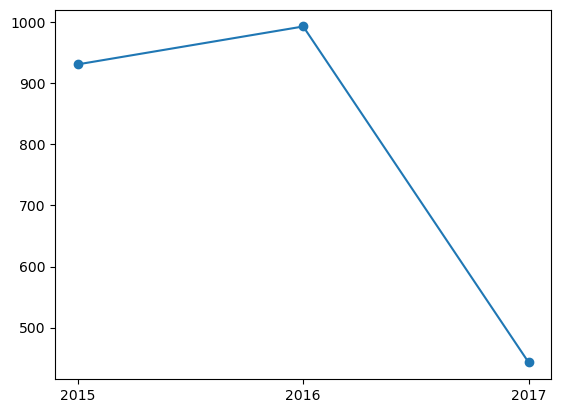

In [6]:
import matplotlib.pyplot as plt

df['Year']=pd.to_datetime(df['Date'],dayfirst=True).dt.year    ## .astype(int),,== showing na erroe
df = df.dropna(subset=['Year'])
# Convert Year to int
df['Year'] = df['Year'].astype(int)

year_wise_funding=df.groupby('Year').size()
print(year_wise_funding)
plt.scatter(year_wise_funding.index,year_wise_funding.values)
plt.plot(year_wise_funding.index,year_wise_funding.values)
plt.xticks(year_wise_funding.index)
plt.show()

## Qs 3- city has most startups , top 10 cities and make pie chart of that cities 

In [24]:
df.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks,Year
0,0,2017-08-01,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,1300000.0,NaN,2017
1,1,2017-08-02,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN,2017
2,2,2017-08-02,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN,2017
3,3,2017-08-02,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,500000.0,NaN,2017
4,4,2017-08-02,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,850000.0,NaN,2017


City with most startups is : BANGALORE 

CityLocation
BANGALORE    628
MUMBAI       444
NEW DELHI    381
GURGAON      240
PUNE          84
NOIDA         78
HYDERABAD     76
CHENNAI       66
AHMEDABAD     35
JAIPUR        25
Name: count, dtype: int64


C:\Users\User\AppData\Local\Temp\ipykernel_12600\3669249987.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CityLocation']=df['CityLocation'].str.upper()  ## finishing case sensitivity problem


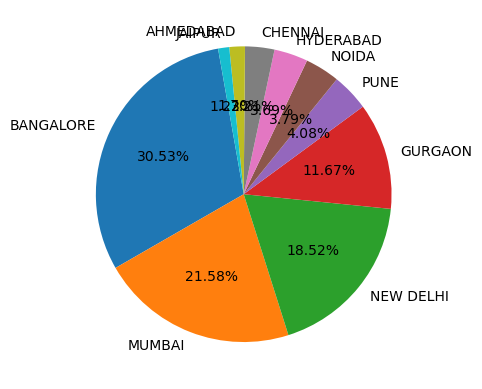

  CityLocation  Count
0    BANGALORE    628
1       MUMBAI    444
2    NEW DELHI    381
3      GURGAON    240
4         PUNE     84


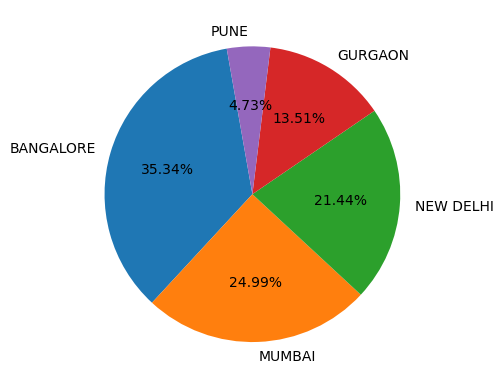

In [34]:
df['CityLocation']=df['CityLocation'].str.upper()  ## finishing case sensitivity problem
top10_startups=df['CityLocation'].value_counts().head(10)
city_with_most_startups=df['CityLocation'].value_counts().idxmax()
print('City with most startups is :',city_with_most_startups,'\n')
print(top10_startups)

city_w_st=df.groupby('CityLocation').size().reset_index(name='Count')
city_w_st=city_w_st.sort_values(by='Count',ascending=False).reset_index(drop=True).head(5)

plt.pie(top10_startups.values,autopct='%.2f%%',startangle=100 , labels=top10_startups.index)
plt.show()

print(city_w_st)
plt.pie(city_w_st.Count,autopct='%.2f%%',startangle=100 , labels=city_w_st.CityLocation)
plt.show()

## Qs 4- Top 10 ind cities with most funding, also do pie chart comparison

In [45]:
df

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks,Year
0,0,2017-08-01,TouchKin,Technology,Predictive Care Platform,BANGALORE,Kae Capital,Private Equity,1300000.0,NaN,2017
1,1,2017-08-02,Ethinos,Technology,Digital Marketing Agency,MUMBAI,Triton Investment Advisors,Private Equity,NaN,NaN,2017
2,2,2017-08-02,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,NEW DELHI,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN,2017
3,3,2017-08-02,Zepo,Consumer Internet,DIY Ecommerce platform,MUMBAI,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,500000.0,NaN,2017
4,4,2017-08-02,Click2Clinic,Consumer Internet,healthcare service aggregator,HYDERABAD,"Narottam Thudi, Shireesh Palle",Seed Funding,850000.0,NaN,2017
...,...,...,...,...,...,...,...,...,...,...,...
2367,2367,2015-01-29,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,4500000.0,NaN,2015
2368,2368,2015-01-29,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,825000.0,Govt backed VC Fund,2015
2369,2369,2015-01-30,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,1500000.0,NaN,2015
2370,2370,2015-01-30,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake",2015


  CityLocation   AmountInUSD
0    BANGALORE  8.383774e+09
1    NEW DELHI  2.750248e+09
2       MUMBAI  2.341194e+09
3      GURGAON  2.067822e+09
4      CHENNAI  4.111050e+08
5         PUNE  2.821530e+08
6    HYDERABAD  1.947620e+08
7        NOIDA  1.703380e+08
8    AHMEDABAD  9.818600e+07
9    PUNE / US  6.850000e+07


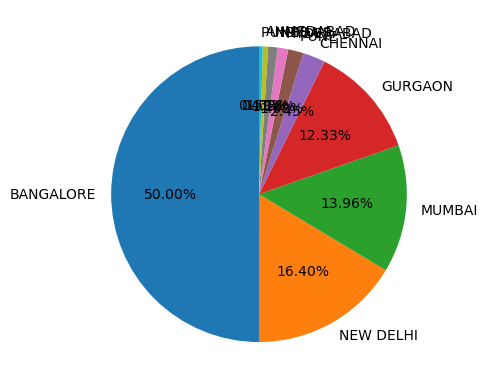

In [8]:
funding_acc_cities=df.groupby('CityLocation')['AmountInUSD'].sum().reset_index()
funding_acc_cities=funding_acc_cities.sort_values(by='AmountInUSD',ascending=False).reset_index(drop=True).head(10)
print(funding_acc_cities)
plt.pie(funding_acc_cities.AmountInUSD,startangle=90,autopct='%.2f%%',labels=funding_acc_cities.CityLocation)
plt.show()

## Qs. 5-Percentage of amounts for all 4 investment types

In [57]:
df.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks,Year
0,0,2017-08-01,TouchKin,Technology,Predictive Care Platform,BANGALORE,Kae Capital,Private Equity,1300000.0,NaN,2017
1,1,2017-08-02,Ethinos,Technology,Digital Marketing Agency,MUMBAI,Triton Investment Advisors,Private Equity,NaN,NaN,2017
2,2,2017-08-02,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,NEW DELHI,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN,2017
3,3,2017-08-02,Zepo,Consumer Internet,DIY Ecommerce platform,MUMBAI,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,500000.0,NaN,2017
4,4,2017-08-02,Click2Clinic,Consumer Internet,healthcare service aggregator,HYDERABAD,"Narottam Thudi, Shireesh Palle",Seed Funding,850000.0,NaN,2017


  InvestmentType   AmountInUSD
0   CROWDFUNDING  1.557680e+05
1    DEBTFUNDING  7.800000e+06
2  PRIVATEEQUITY  1.800708e+10
3    SEEDFUNDING  3.289957e+08 


  InvestmentType   AmountInUSD  InvestmentPercentage
0   CROWDFUNDING  1.557680e+05                     0
1    DEBTFUNDING  7.800000e+06                     0
2  PRIVATEEQUITY  1.800708e+10                     0
3    SEEDFUNDING  3.289957e+08                     0 


  InvestmentType  InvestmentPercentage
0  PRIVATEEQUITY             98.163155
1    SEEDFUNDING              1.793475
2    DEBTFUNDING              0.042521
3   CROWDFUNDING              0.000849


C:\Users\User\AppData\Local\Temp\ipykernel_12600\2161076620.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvestmentType']=df['InvestmentType'].str.upper()
C:\Users\User\AppData\Local\Temp\ipykernel_12600\2161076620.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvestmentType']=df['InvestmentType'].str.split().str.join('')
C:\Users\User\AppData\Local\Temp\ipykernel_12600\2161076620.py:19: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error 

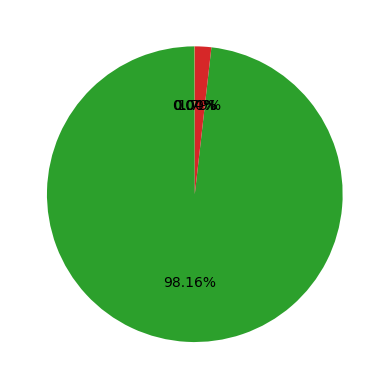

In [10]:
df['InvestmentType']=df['InvestmentType'].str.upper()
df['InvestmentType']=df['InvestmentType'].str.split().str.join('')
investmentType_funding=df.groupby('InvestmentType')['AmountInUSD'].sum().reset_index()
print(investmentType_funding,'\n\n')

def calculate_investment_percentage(row, total_sum):
    return (row * 100) / total_sum

# Get the total sum of 'AmountInUSD'
total_sum = df['AmountInUSD'].sum()

# Create a new column for investment percentage
investmentType_funding['InvestmentPercentage'] = 0  # Initialize with zero

print(investmentType_funding,'\n\n')

# Iterate over the rows and calculate the percentage
for i in range(len(investmentType_funding)):
    investmentType_funding.loc[i, 'InvestmentPercentage'] = calculate_investment_percentage(investmentType_funding.loc[i, 'AmountInUSD'], total_sum)

# Display the dataframe with InvestmentType and InvestmentPercentage
print(investmentType_funding[['InvestmentType', 'InvestmentPercentage']].sort_values(by='InvestmentPercentage',ascending=False).reset_index(drop=True))

plt.pie(investmentType_funding.AmountInUSD,autopct='%.2f%%',startangle=90)
plt.show()

## Qs. 6 - top 5 industries , and percentage of funding to it 

In [86]:
df.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks,Year,InvestmentPercentage
0,0,2017-08-01,TouchKin,Technology,Predictive Care Platform,BANGALORE,Kae Capital,PRIVATEEQUITY,1300000.0,NaN,2017,0.007087
1,1,2017-08-02,Ethinos,Technology,Digital Marketing Agency,MUMBAI,Triton Investment Advisors,PRIVATEEQUITY,NaN,NaN,2017,NaN
2,2,2017-08-02,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,NEW DELHI,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",SEEDFUNDING,NaN,NaN,2017,NaN
3,3,2017-08-02,Zepo,Consumer Internet,DIY Ecommerce platform,MUMBAI,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",SEEDFUNDING,500000.0,NaN,2017,0.002726
4,4,2017-08-02,Click2Clinic,Consumer Internet,healthcare service aggregator,HYDERABAD,"Narottam Thudi, Shireesh Palle",SEEDFUNDING,850000.0,NaN,2017,0.004634


In [12]:
df['IndustryVertical'] = df['IndustryVertical'].str.strip().str.title()

top_ind=df.groupby('IndustryVertical')['AmountInUSD'].sum().reset_index()
top_ind = top_ind.sort_values(by='AmountInUSD', ascending=False).reset_index(drop=True).head(5)
print(top_ind)

def calculatepercentage(row,total_sum):
    return row*100/total_sum
total_sum=top_ind['AmountInUSD'].sum()
top_ind['percentage']=0
for i in range(len(top_ind)):
    top_ind.loc[i,'percentage']=calculatepercentage(top_ind.loc[i,'AmountInUSD'],total_sum)

top_ind

                   IndustryVertical   AmountInUSD
0                         Ecommerce  4.281190e+09
1                 Consumer Internet  3.797089e+09
2                        Technology  1.103594e+09
3                Online Marketplace  7.000000e+08
4  E-Commerce & M-Commerce Platform  6.800000e+08


C:\Users\User\AppData\Local\Temp\ipykernel_12600\2794877971.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['IndustryVertical'] = df['IndustryVertical'].str.strip().str.title()
C:\Users\User\AppData\Local\Temp\ipykernel_12600\2794877971.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '40.53438220253822' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  top_ind.loc[i,'percentage']=calculatepercentage(top_ind.loc[i,'AmountInUSD'],total_sum)


,IndustryVertical,AmountInUSD,percentage
0,Ecommerce,4.281190e+09,40.534382
1,Consumer Internet,3.797089e+09,35.950909
2,Technology,1.103594e+09,10.448844
3,Online Marketplace,7.000000e+08,6.627613
4,E-Commerce & M-Commerce Platform,6.800000e+08,6.438253


## Qs.7- Top 5 startups

In [13]:
df.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks,Year
0,0,2017-08-01,TouchKin,Technology,Predictive Care Platform,BANGALORE,Kae Capital,PRIVATEEQUITY,1300000.0,NaN,2017
1,1,2017-08-02,Ethinos,Technology,Digital Marketing Agency,MUMBAI,Triton Investment Advisors,PRIVATEEQUITY,NaN,NaN,2017
2,2,2017-08-02,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,NEW DELHI,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",SEEDFUNDING,NaN,NaN,2017
3,3,2017-08-02,Zepo,Consumer Internet,DIY Ecommerce platform,MUMBAI,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",SEEDFUNDING,500000.0,NaN,2017
4,4,2017-08-02,Click2Clinic,Consumer Internet,healthcare service aggregator,HYDERABAD,"Narottam Thudi, Shireesh Palle",SEEDFUNDING,850000.0,NaN,2017


In [25]:
df['StartupName'] = df['StartupName'].replace({
    'Olacabs': 'Ola', 
    'Ola Cabs': 'Ola', 
    'Flipkart.com': 'Flipkart',
    'Paytm Marketplace': 'Paytm'
})
top5_st=df.groupby('StartupName')['AmountInUSD'].sum().reset_index()
top5_st=top5_st.sort_values(by='AmountInUSD', ascending=False).reset_index(drop=True).head(5)
print(top5_st)

  StartupName   AmountInUSD
0       Paytm  2.340000e+09
1    Flipkart  2.259700e+09
2         Ola  1.899500e+09
3    Snapdeal  7.000000e+08
4   Oyo Rooms  3.500000e+08


C:\Users\User\AppData\Local\Temp\ipykernel_12600\1930081721.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['StartupName'] = df['StartupName'].replace({


## Qs 8- top 5 with most funding rounds

In [42]:
top5_most_fn_rounds=df.groupby('StartupName').size().reset_index(name='RoundsOfFunding')
top5_most_fn_rounds=top5_most_fn_rounds.sort_values(by='RoundsOfFunding',ascending=False).reset_index(drop=True)
print(top5_most_fn_rounds.head(10))


  StartupName  RoundsOfFunding
0         Ola                9
1      Swiggy                7
2   UrbanClap                6
3       Paytm                6
4    NoBroker                5
5    Flipkart                5
6      Jugnoo                5
7     Medinfi                5
8       Vyomo                4
9     Niki.ai                4
